# MACD FOR TOY PROBLEM

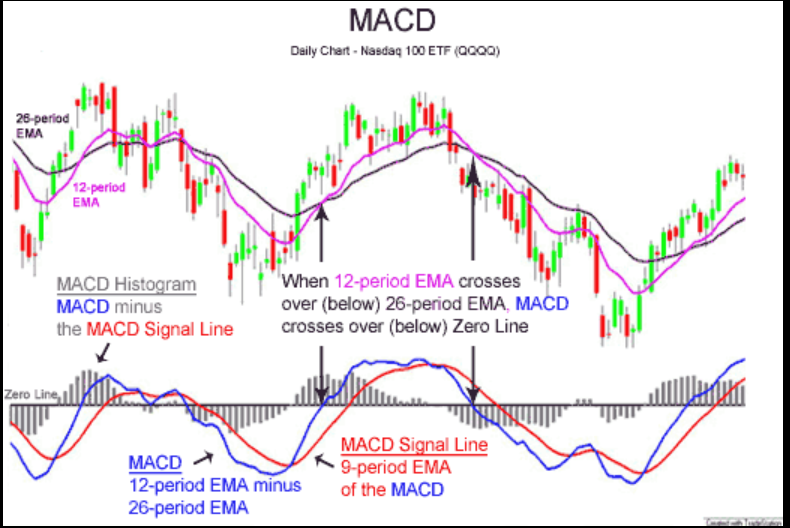

In [8]:
#header files
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

In [9]:
df=pd.read_csv(r'C:\Users\Sihab Uddin\Desktop\data.csv',index_col=0,parse_dates=True)

In [10]:
#calculating MACD by subracting exponential moving average of 12 weeks and 26 weeks. 
df['EMA12'] = df['Close'].ewm(span=12).mean()
df['EMA26'] = df['Close'].ewm(span=26).mean()
df['MACD'] = df['EMA26'] - df['EMA12']

In [11]:
#calculating signal and histogram. 
df['MACDSignalLine'] = df['MACD'].ewm(span=9).mean()
df['Histogram'] = df['MACD'] - df['MACDSignalLine']

In [14]:
#ploting 
apds = [mpf.make_addplot(df['EMA12'][-150:], color='yellow'),
        mpf.make_addplot(df['EMA26'][-150:], color='c'),
        mpf.make_addplot(df['MACD'][-150:], panel=1, secondary_y=True, color='orange'),
        mpf.make_addplot(df['MACDSignalLine'][-150:], panel=1, secondary_y=True, color='blue'),
        mpf.make_addplot(df['Histogram'][-150:], panel=1, type='bar', color='purple', secondary_y=False)]


Text(0.5, 1.0, 'Toy Problem Technical Analysis')

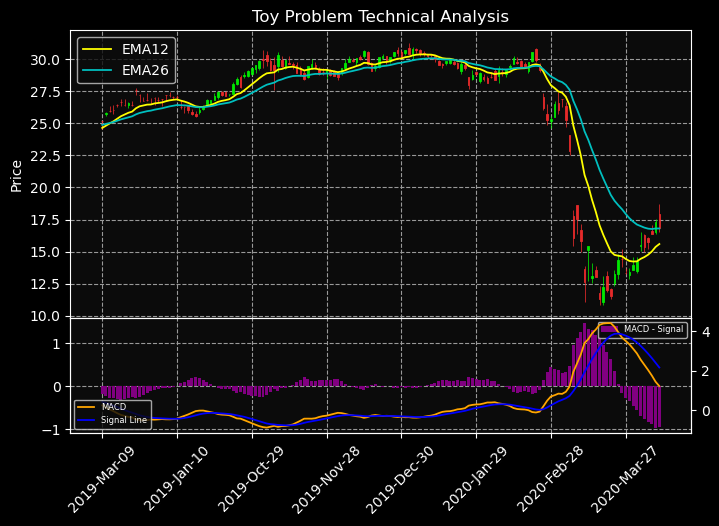

In [15]:
# Create my own `marketcolors` to use with the `nightclouds` style:
mc = mpf.make_marketcolors(up='#00ff00',down='#ff2e2e',inherit=True)

# Create a new style based on `nightclouds` but with my own `marketcolors`:
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)

fig, axes = mpf.plot(df[-150:], 
                     volume_panel = 2,
                     figratio=(1.5,1),
                     figscale=1, 
                     type='candle', 
                     style=s,
                     addplot=apds,
                     returnfig=True)

labels = ['EMA12', 'EMA26']

axes[0].legend(labels, loc='upper left')
axes[2].legend(['MACD - Signal'], fontsize=6, loc='upper right')
axes[3].legend(['MACD', 'Signal Line'], fontsize=6, loc='lower left')

axes[0].set_title('Toy Problem Technical Analysis')

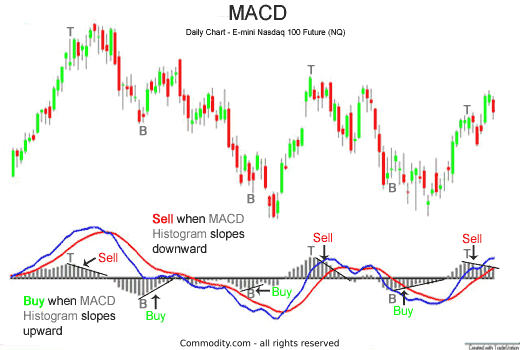

In [16]:
df.to_csv(r'C:\Users\Sihab Uddin\Desktop\datacombined.csv')

Notes: 240 days are shown in the analysis because the software is not capable of visualizing big data. 

Special thanks to Aidan Wilson (https://medium.com/analytics-vidhya/algorithmic-trading-in-python-macd-ca508c0017b)

Image credit: 

https://commons.wikimedia.org/wiki/File:MACDpicwiki.gif

https://commodity.com/technical-analysis/macd/
